In [1]:
import pandas as pd
import json


In [2]:
filename = 'input.json'

with open(filename,'r') as f:
    data = json.load(f)
    f.close()
    
print(data)

[{'Gender': 'Male', 'HeightCm': 171, 'WeightKg': 96}, {'Gender': 'Male', 'HeightCm': 161, 'WeightKg': 85}, {'Gender': 'Male', 'HeightCm': 180, 'WeightKg': 77}, {'Gender': 'Female', 'HeightCm': 166, 'WeightKg': 62}, {'Gender': 'Female', 'HeightCm': 150, 'WeightKg': 70}, {'Gender': 'Female', 'HeightCm': 167, 'WeightKg': 82}]


In [3]:
df = pd.read_json('input.json')
df

,Gender,HeightCm,WeightKg
0,Male,171,96
1,Male,161,85
2,Male,180,77
3,Female,166,62
4,Female,150,70
5,Female,167,82


In [4]:
df['Heightm'] = df['HeightCm']/100

In [6]:
df['BMI'] = df['WeightKg']/(df['Heightm']**2)
df

,Gender,HeightCm,WeightKg,Heightm,BMI
0,Male,171,96,1.71,32.830615
1,Male,161,85,1.61,32.791945
2,Male,180,77,1.80,23.765432
3,Female,166,62,1.66,22.499637
4,Female,150,70,1.50,31.111111
5,Female,167,82,1.67,29.402273


BMI Category and Health risk Table
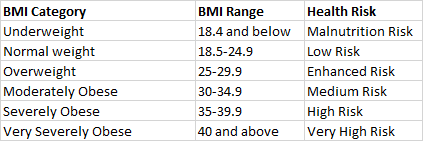

In [7]:
bins = [0,18.5,25,30,35,40,300]

# Considering highest BMI to be above 200

bmi_category = ['Underweight','Normal weight','Overweight','Moderately Obese','Severely Obese','Very Severely Obese']
health_risk = ['Malnutrition Risk','Low Risk','Enhanced Risk','Medium Risk','High Risk','Very High Risk']


In [10]:
df['BMI Category'] = pd.cut(df['BMI'],bins,labels=bmi_category,include_lowest=True)

In [11]:
df

,Gender,HeightCm,WeightKg,Heightm,BMI,BMI Category
0,Male,171,96,1.71,32.830615,Moderately Obese
1,Male,161,85,1.61,32.791945,Moderately Obese
2,Male,180,77,1.80,23.765432,Normal weight
3,Female,166,62,1.66,22.499637,Normal weight
4,Female,150,70,1.50,31.111111,Moderately Obese
5,Female,167,82,1.67,29.402273,Overweight


In [14]:
df['Health Risk'] = pd.cut(df.BMI,bins,labels=health_risk,include_lowest=True)

In [15]:
df

,Gender,HeightCm,WeightKg,Heightm,BMI,BMI Category,Health Risk
0,Male,171,96,1.71,32.830615,Moderately Obese,Medium Risk
1,Male,161,85,1.61,32.791945,Moderately Obese,Medium Risk
2,Male,180,77,1.80,23.765432,Normal weight,Low Risk
3,Female,166,62,1.66,22.499637,Normal weight,Low Risk
4,Female,150,70,1.50,31.111111,Moderately Obese,Medium Risk
5,Female,167,82,1.67,29.402273,Overweight,Enhanced Risk


In [19]:
df.describe()

,HeightCm,WeightKg,Heightm,BMI
count,6.000000,6.000000,6.000000,6.000000
mean,165.833333,78.666667,1.658333,28.733502
std,10.028293,11.893976,0.100283,4.536526
min,150.000000,62.000000,1.500000,22.499637
25%,162.250000,71.750000,1.622500,25.174642
50%,166.500000,79.500000,1.665000,30.256692
75%,170.000000,84.250000,1.700000,32.371736
max,180.000000,96.000000,1.800000,32.830615


In [21]:
# Calculate the overweight people

df['BMI Category'].value_counts()['Overweight']

1